In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [9]:
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9]
}

df = pd.DataFrame(data)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
              TV      Radio  Newspaper      Sales
count    5.00000   5.000000   5.000000   5.000000
mean   124.82000  35.020000  60.100000  14.640000
std     90.77834  13.878653   9.973715   5.478868
min     17.20000  10.800000  45.100000   9.300000
25%     44.50000  37.800000  58.400000  10.400000
50%    151.50000  39.300000  58.500000  12.900000
75%    180.80000  41.300000  69.200000  18.500000
max    230.10000  45.900000  69.300000  22.100000


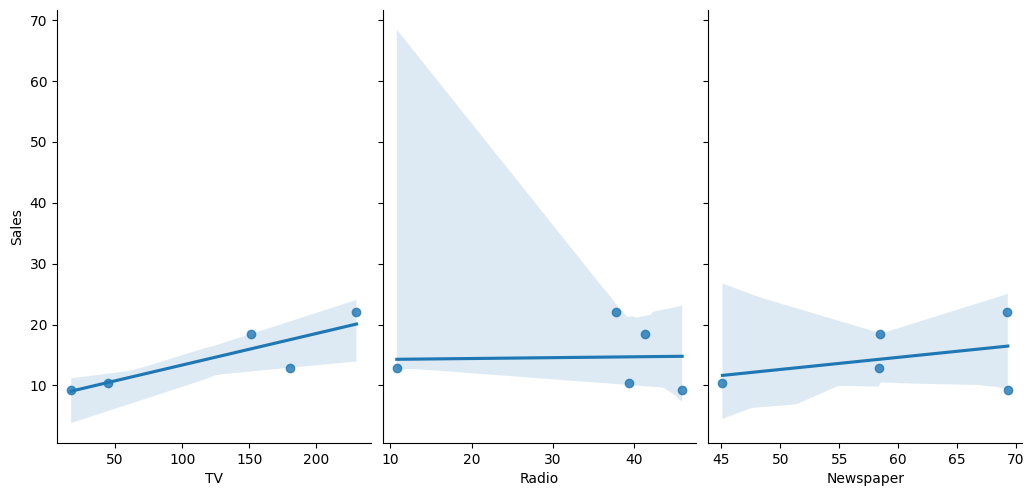

In [10]:
print(df.head())
print(df.describe())

# Visualizing the data
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')
plt.show()


In [11]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 1.94
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


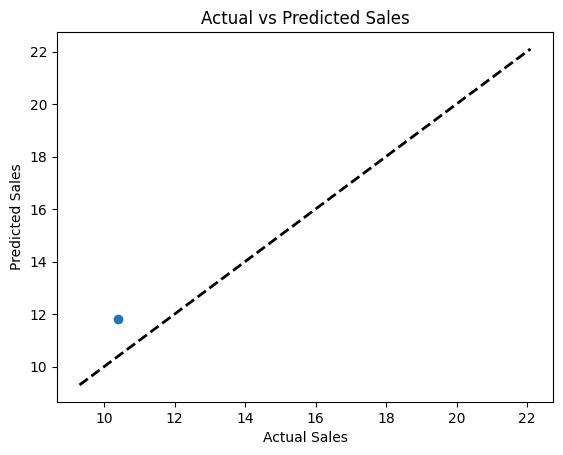

In [13]:
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Plotting predicted vs actual sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [14]:
# Predicting on new data
new_data = pd.DataFrame({
    'TV': [150.0, 230.0],
    'Radio': [30.0, 40.0],
    'Newspaper': [20.0, 50.0]
})
predictions = model.predict(new_data)
print(predictions)

[19.13948663 24.42906874]
